In [5]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from scipy.optimize import minimize
from sklearn.base import BaseEstimator

In [6]:
def f(x,sigma=3.4,epsilon=0.997):
    r = np.linalg.norm(x[0] - x[1])
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

In [7]:
def Accept_val(delta,temp):
    if(delta<0):
        return True
    elif(random.random() < math.exp(-delta / temp)):
        return True
    else:
        return False

In [8]:
def sim_anneal(initial_sol=None,Temp=300,cooling_rate=0.95,max_iter=1000):
    if(initial_sol==None):
        initial_sol = [random.uniform(-3,3) for i in range(2)]
    current_sol = initial_sol
    current_energy = f(current_sol)
    best_sol = current_sol
    best_energy = current_energy
    best_store = [[best_energy,0]]
    for i in range(max_iter):
        new_sol = current_sol
        new_sol[0] += random.uniform(-0.2,0.2)
        new_sol[1] += random.uniform(-0.2,0.2)
        new_energy = f(new_sol)
        del_energy = new_energy - current_energy
        if(Accept_val(delta=del_energy,temp=Temp)):
            current_sol = new_sol
            current_energy = new_energy
            if(current_energy<best_energy):
                best_sol = current_sol
                best_energy = current_energy
                best_store += [[best_energy,i]]
        Temp *= cooling_rate
    
    return best_energy,best_sol,best_store

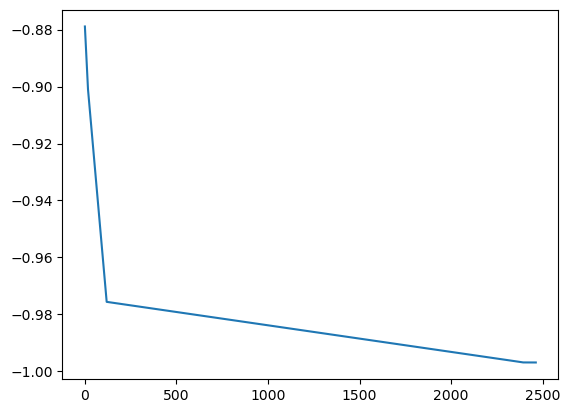

In [11]:
fun_val,best_sol,data=sim_anneal(Temp=300,cooling_rate=0.99,max_iter=5000)
x = [row[1] for row in data]
y = [row[0] for row in data]
plt.plot(x,y)
plt.show()

In [12]:
best_sol

[-5.733546232502259, 4.133833860459162]

In [14]:
-best_sol[0]+best_sol[1]

9.86738009296142

In [10]:
val_store = []
for i in range(500):
    fun_val,_,_ = sim_anneal(Temp=300,cooling_rate=0.99,max_iter=5000)
    val_store += [fun_val] 
print(min(val_store))
print(max(val_store))
print(sum(val_store)/len(val_store))

-0.9969999999839425
-0.21050190522878917
-0.9919306173341434


In [54]:
X = [[random.uniform(-3, 3) for _ in range(2)] for _ in range(1000)]
Y = [0] * len(X)

In [57]:
param_space = {
    'Temp': Real(1e-6, 1e3, prior='log-uniform'),
    'cooling_rate': Real(0.5, 0.99),
    'max_iter': Integer(10, 1000)
}